<a href="https://colab.research.google.com/github/RafaelCaballero/BME/blob/main/mfia/ejemplos/conos_volatilidad.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

[*********************100%***********************]  1 of 1 completed


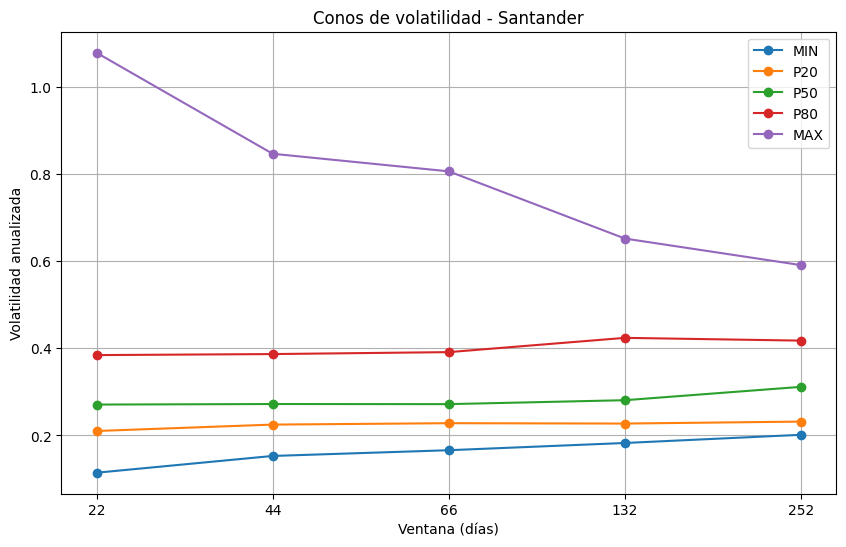

In [2]:
import yfinance as yf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


def conos(valor,fecha_ini="2015-01-01"):
    # 1. Descargar datos históricos del valor
    datos = yf.download(valor, start=fecha_ini)

    # 2. Calcular log-rendimientos
    datos['Log_Ret'] = np.log(datos['Close'] / datos['Close'].shift(1))
    log_ret = datos['Log_Ret'].dropna()

    # 3. Definir ventanas de tiempo
    ventanas = [22, 44, 66, 132, 252]  # días
    anualizacion = np.sqrt(252)

    # 4. Calcular volatilidades anualizadas por ventana
    volatilidades = {}

    for ventana in ventanas:
        vol = log_ret.rolling(window=ventana).std() * anualizacion
        volatilidades[ventana] = vol

    # 5. Calcular estadísticos para cada ventana
    estadisticos = ['min', 'p20', 'p50', 'p80', 'max']
    resultados = {}

    for ventana, serie in volatilidades.items():
        serie = serie.dropna() # esto sobra, creo
        resultados[ventana] = {
            'min': serie.min(),
            'p20': np.percentile(serie, 20),
            'p50': np.percentile(serie, 50),
            'p80': np.percentile(serie, 80),
            'max': serie.max()
        }

    # 6. Convertir a DataFrame
    df_conos = pd.DataFrame(resultados).T
    df_conos.index.name = 'Ventana'

    # 7. Graficar
    plt.figure(figsize=(10, 6))
    x_vals = np.arange(len(ventanas))
    for stat in estadisticos:
        plt.plot(x_vals, df_conos[stat], marker='o', label=stat.upper())

    plt.xticks(x_vals, ventanas)
    plt.title('Conos de volatilidad - Santander')
    plt.xlabel('Ventana (días)')
    plt.ylabel('Volatilidad anualizada')
    plt.grid(True)
    plt.legend()
    plt.show()

conos("SAN.MC")

[*********************100%***********************]  1 of 1 completed


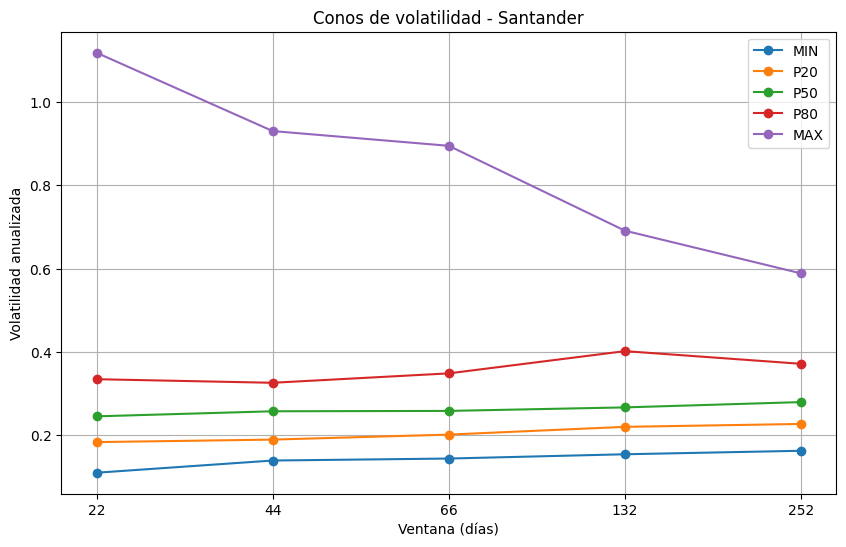

In [3]:
conos("BNP.PA")